In [91]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/CAvideos.csv
/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/FR_category_id.json
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/GB_category_id.json


In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm

In [93]:
US_video=pd.read_csv("/kaggle/input/youtube-new/USvideos.csv")

In [94]:
US_video.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [95]:
print(US_video.columns)
print(US_video.dtypes)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')
video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object


In [96]:
print(US_video["video_id"].value_counts())

j4KvrAUjn6c    30
iILJvqrAQ_w    29
r-3iathMo7o    29
QBL8IRJ5yHU    29
MAjY8mCTXWk    29
               ..
m6lY1GXTu5M     1
5RjEaUqucbw     1
pVgx8pYpwRE     1
T3hXC5yNZOc     1
ym4MWosKD6M     1
Name: video_id, Length: 6351, dtype: int64


In [97]:
print(US_video["publish_time"].value_counts())
US_video["publish_time"]=pd.to_datetime(US_video["publish_time"])

2018-05-18T14:00:04.000Z    50
2018-05-06T13:00:05.000Z    32
2018-05-13T18:03:56.000Z    30
2018-05-09T17:00:00.000Z    29
2018-05-14T14:00:03.000Z    29
                            ..
2016-10-13T16:57:52.000Z     1
2017-12-08T18:09:53.000Z     1
2018-01-10T16:55:28.000Z     1
2018-03-20T13:00:45.000Z     1
2017-11-10T04:00:52.000Z     1
Name: publish_time, Length: 6269, dtype: int64


In [98]:
US_video=US_video.assign(publish_day=US_video.publish_time.dt.day,publish_month=US_video.publish_time.dt.month,publish_year=US_video.publish_time.dt.year)

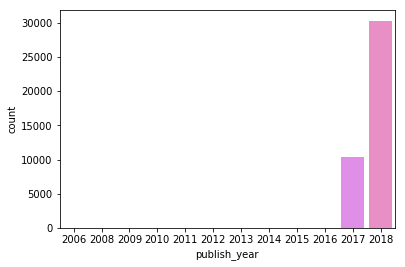

In [99]:
sns.countplot(x=US_video["publish_year"],data=US_video)

In [100]:
US_video.drop(US_video[US_video["publish_year"]<2017].index,inplace=True)

,likes,dislikes,views,comment_count
publish_year,,,,
2017,47935.029824,2991.047277,1.313908e+06,5780.985232
2018,83925.168533,3988.920374,2.739773e+06,9431.740117


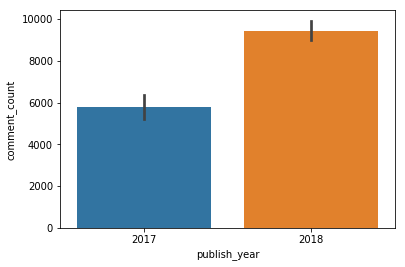

In [101]:
sns.barplot(x=US_video["publish_year"],y=US_video["comment_count"])
US_video.groupby("publish_year")["likes","dislikes","views","comment_count"].mean()

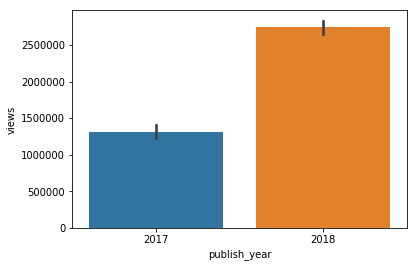

In [102]:

sns.barplot(x=US_video["publish_year"],y=US_video["views"])

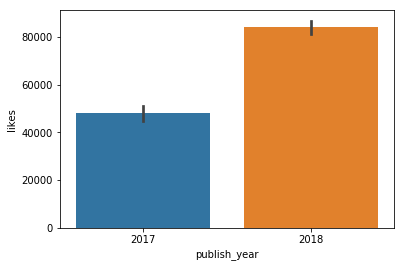

In [103]:
sns.barplot(x=US_video["publish_year"],y=US_video["likes"])


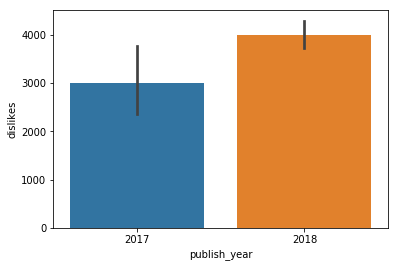

In [104]:
sns.barplot(x=US_video["publish_year"],y=US_video["dislikes"])

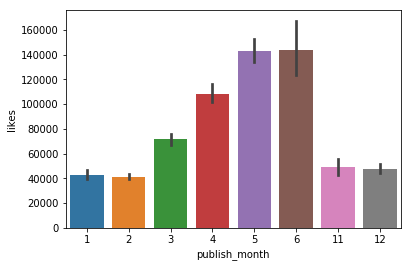

In [105]:
sns.countplot(x=US_video["publish_month"],data=US_video)
US_video.drop(US_video[(US_video["publish_month"]<11) & (US_video["publish_month"]>7)].index,inplace=True)
sns.barplot(x=US_video["publish_month"],y=US_video["likes"])

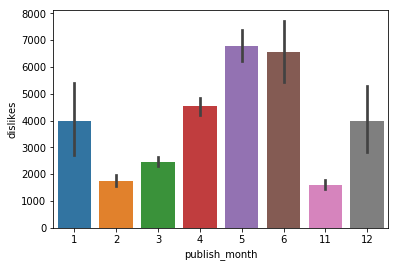

In [106]:
sns.barplot(x=US_video["publish_month"],y=US_video["dislikes"])

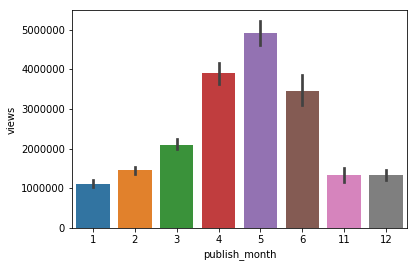

In [107]:
sns.barplot(x=US_video["publish_month"],y=US_video["views"])

,likes,dislikes,views,comment_count
publish_month,,,,
1,43058.747087,3973.271304,1.114892e+06,6737.001275
2,41465.552958,1764.652104,1.447916e+06,5067.605352
3,71427.723868,2463.214751,2.100250e+06,7653.214588
4,108474.880386,4542.152469,3.900867e+06,10670.030494
5,143137.735986,6766.430681,4.904549e+06,15477.199066
6,143984.910308,6553.883534,3.453943e+06,17677.775100
11,49151.855100,1616.097235,1.327496e+06,5657.602240
12,47743.088632,3969.174337,1.321756e+06,5941.969426


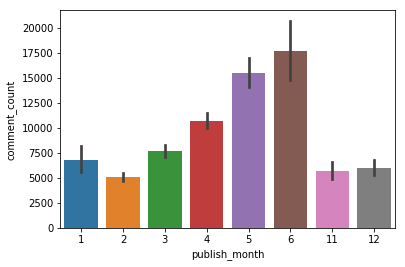

In [108]:
sns.barplot(x=US_video["publish_month"],y=US_video["comment_count"])
US_video.groupby("publish_month")["likes","dislikes","views","comment_count"].mean()

In [109]:
print(US_video["trending_date"].value_counts())
US_video["trending_date"]=pd.to_datetime(US_video["trending_date"],format="%y.%d.%m")
US_video=US_video.assign(trending_day=US_video.trending_date.dt.day,trending_month=US_video.trending_date.dt.month,trending_year=US_video.trending_date.dt.year)


18.09.05    200
18.12.05    200
18.04.06    200
18.28.05    200
18.20.04    200
           ... 
17.25.11    191
18.04.01    191
18.01.01    191
17.26.11    190
17.27.11    188
Name: trending_date, Length: 205, dtype: int64


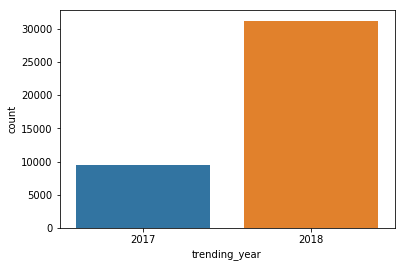

In [110]:
sns.countplot(x=US_video["trending_year"],data=US_video)

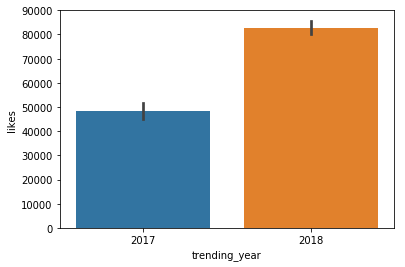

In [111]:
sns.barplot(x=US_video["trending_year"],y=US_video["likes"])

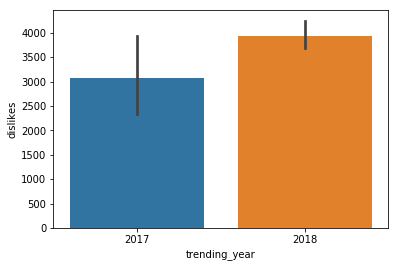

In [112]:
sns.barplot(x=US_video["trending_year"],y=US_video["dislikes"])

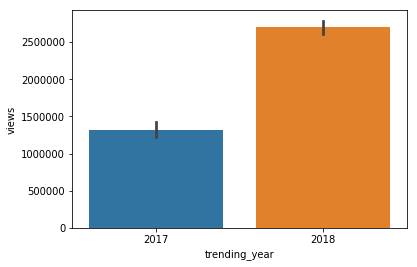

In [113]:
sns.barplot(x=US_video["trending_year"],y=US_video["views"])

,likes,dislikes,views,comment_count
trending_year,,,,
2017,48256.138536,3067.878490,1.315087e+06,5892.811760
2018,82864.147698,3942.026545,2.700087e+06,9301.802001


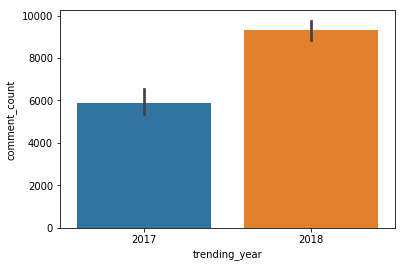

In [114]:
sns.barplot(x=US_video["trending_year"],y=US_video["comment_count"])
US_video.groupby("trending_year")["likes","dislikes","views","comment_count"].mean()

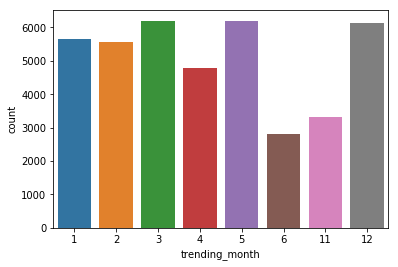

In [115]:
sns.countplot(x=US_video["trending_month"],data=US_video)

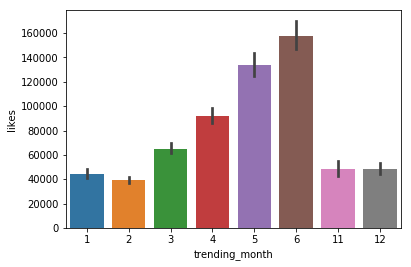

In [116]:
sns.barplot(x=US_video["trending_month"],y=US_video["likes"])

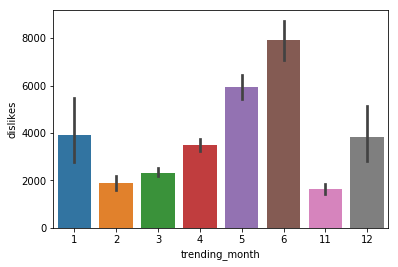

In [117]:
sns.barplot(x=US_video["trending_month"],y=US_video["dislikes"])

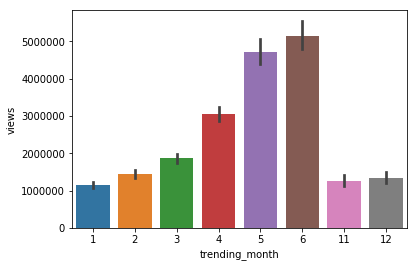

In [118]:
sns.barplot(x=US_video["trending_month"],y=US_video["views"])

,likes,dislikes,views,comment_count
trending_month,,,,
1,44588.155276,3937.803824,1.139399e+06,6762.877479
2,39175.762675,1883.890687,1.446565e+06,4515.005214
3,65147.867055,2333.682031,1.867793e+06,7499.094614
4,92189.282500,3491.853542,3.039599e+06,9475.014167
5,133593.568801,5949.443781,4.707389e+06,14507.846427
6,157680.232500,7917.900357,5.150089e+06,16089.823929
11,48024.287009,1633.917523,1.269075e+06,5319.835952
12,48381.004881,3840.154897,1.339868e+06,6201.394566


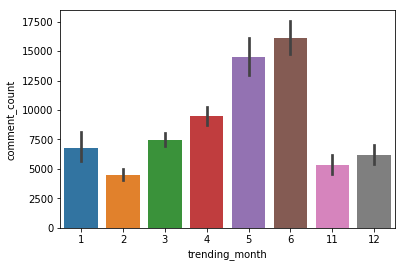

In [119]:
sns.barplot(x=US_video["trending_month"],y=US_video["comment_count"])
US_video.groupby("trending_month")["likes","dislikes","views","comment_count"].mean()

In [120]:
print(US_video["title"].value_counts())
print(US_video["channel_title"].value_counts())

WE MADE OUR MOM CRY...HER DREAM CAME TRUE!                                         30
Why I'm So Scared (being myself and crying too much)                               29
Sam Smith - Pray (Official Video) ft. Logic                                        29
Charlie Puth - BOY [Official Audio]                                                29
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures       29
                                                                                   ..
The Unexpected Beauty Of A Mormon Wedding | World Wide Wed | Refinery29             1
[FULL] Dana White goes off on Conor McGregor storming UFC 223 media day | ESPN      1
Urban Meyer reacts to Ohio State not making the College Football Playoff | ESPN     1
BTS Fans Get the Surprise of a Lifetime                                             1
How Do Machines Learn?                                                              1
Name: title, Length: 6368, dtype: int64
ESPN          

In [121]:
US_video["category_id"]=US_video["category_id"].astype("object")
print(US_video["category_id"].value_counts())

24    9902
10    6442
26    4140
23    3446
22    3190
25    2472
28    2378
1     2291
17    2150
27    1631
15     918
20     811
19     400
2      363
43      57
29      57
Name: category_id, dtype: int64


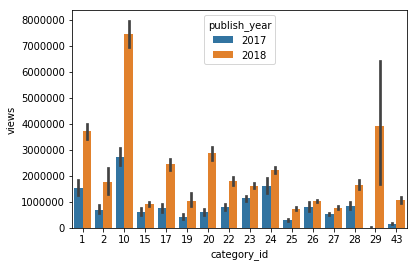

In [122]:
sns.barplot(x=US_video["category_id"],y=US_video["views"],data=US_video,hue="publish_year")


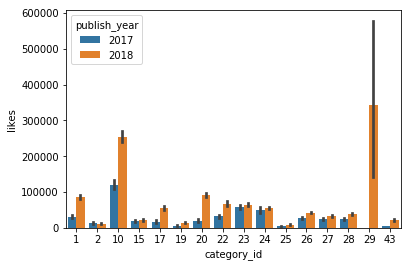

In [123]:
sns.barplot(x=US_video["category_id"],y=US_video["likes"],data=US_video,hue="publish_year")



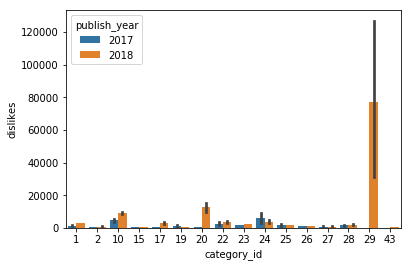

In [124]:
sns.barplot(x=US_video["category_id"],y=US_video["dislikes"],data=US_video, hue="publish_year")



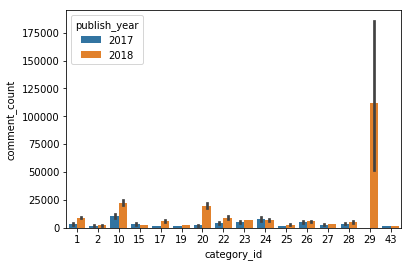

In [125]:
sns.barplot(x=US_video["category_id"],y=US_video["comment_count"],data=US_video,hue="publish_year")


In [126]:
US_video.groupby("category_id")["views","likes","dislikes","comment_count"].mean()

,views,likes,dislikes,comment_count
category_id,,,,
1,3.177545e+06,72429.220864,2650.817110,7803.734177
2,1.433328e+06,11680.798898,667.504132,2158.316804
10,6.229605e+06,219935.847563,7944.531046,19449.638777
15,8.329431e+05,21100.943355,574.486928,2898.369281
17,2.048421e+06,45869.900465,2387.667907,5205.570233
19,8.588869e+05,12090.582500,851.067500,2278.767500
20,2.639886e+06,85125.573366,11324.737361,18175.377312
22,1.541038e+06,58498.268966,3193.493103,7767.160815
23,1.484667e+06,62781.291352,2098.130006,6542.336332


In [127]:
print(US_video["views"].describe())


count    4.064800e+04
mean     2.377893e+06
std      7.418755e+06
min      5.490000e+02
25%      2.490940e+05
50%      6.911940e+05
75%      1.837612e+06
max      2.252119e+08
Name: views, dtype: float64


In [128]:
print(US_video["likes"].describe())


count    4.064800e+04
mean     7.481324e+04
std      2.296428e+05
min      0.000000e+00
25%      5.613750e+03
50%      1.838700e+04
75%      5.592300e+04
max      5.613827e+06
Name: likes, dtype: float64


In [129]:
print(US_video["dislikes"].describe())


count    4.064800e+04
mean     3.738672e+03
std      2.913526e+04
min      0.000000e+00
25%      2.090000e+02
50%      6.410000e+02
75%      1.958250e+03
max      1.674420e+06
Name: dislikes, dtype: float64


In [130]:
print(US_video["comment_count"].describe())

count    4.064800e+04
mean     8.508764e+03
std      3.756187e+04
min      0.000000e+00
25%      6.290000e+02
50%      1.881000e+03
75%      5.815000e+03
max      1.361580e+06
Name: comment_count, dtype: float64


In [131]:
x1=np.log(US_video["views"])
y1=np.log(US_video["likes"])
y2=np.log(US_video["dislikes"])
y3=np.log(US_video["comment_count"])


/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


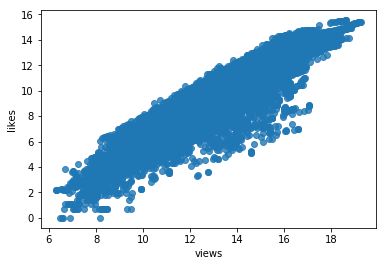

In [132]:
sns.regplot(x=x1,y=y1,fit_reg=False)

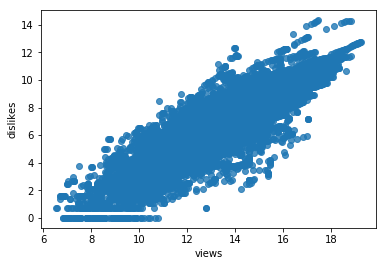

In [133]:
sns.regplot(x=x1,y=y2,fit_reg=False)

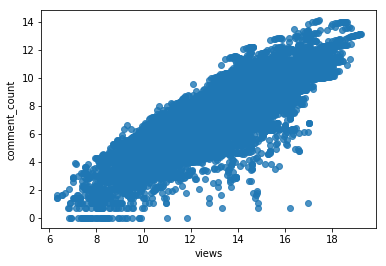

In [134]:
sns.regplot(x=x1,y=y3,fit_reg=False)

In [135]:
num_data=US_video.select_dtypes(exclude=["object","bool"])
num_data.corr()

,views,likes,dislikes,comment_count,publish_day,publish_month,publish_year,trending_day,trending_month,trending_year
views,1.000000,0.849064,0.472119,0.617442,-0.036457,-0.025723,0.083357,-0.000720,-0.010667,0.078879
likes,0.849064,1.000000,0.447082,0.802981,-0.021299,-0.015617,0.067806,-0.000054,-0.003472,0.063674
dislikes,0.472119,0.447082,1.000000,0.700145,-0.028048,0.000378,0.014678,-0.007428,0.004269,0.012677
comment_count,0.617442,0.802981,0.700145,1.000000,-0.020298,-0.012197,0.041990,0.000718,-0.004714,0.038346
publish_day,-0.036457,-0.021299,-0.028048,-0.020298,1.000000,0.058011,-0.101952,0.113836,0.044293,-0.045246
publish_month,-0.025723,-0.015617,0.000378,-0.012197,0.058011,1.000000,-0.941995,0.048824,0.903854,-0.882504
publish_year,0.083357,0.067806,0.014678,0.041990,-0.101952,-0.941995,1.000000,-0.063504,-0.841869,0.940880
trending_day,-0.000720,-0.000054,-0.007428,0.000718,0.113836,0.048824,-0.063504,1.000000,0.077332,-0.138492
trending_month,-0.010667,-0.003472,0.004269,-0.004714,0.044293,0.903854,-0.841869,0.077332,1.000000,-0.927438
trending_year,0.078879,0.063674,0.012677,0.038346,-0.045246,-0.882504,0.940880,-0.138492,-0.927438,1.000000


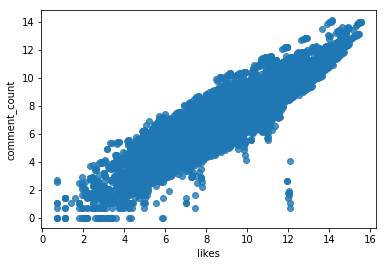

In [136]:
sns.regplot(x=y1,y=y3,fit_reg=False)

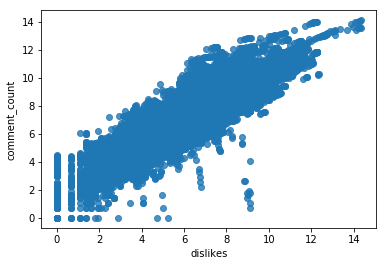

In [137]:
sns.regplot(x=y2,y=y3,fit_reg=False)

False    40025
True       623
Name: comments_disabled, dtype: int64


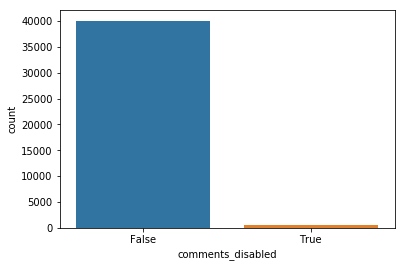

In [138]:
print(US_video["comments_disabled"].value_counts())
sns.countplot(x="comments_disabled",data=US_video)

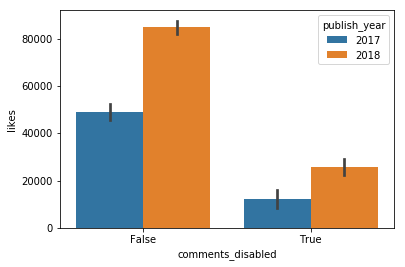

In [139]:
sns.barplot(x="comments_disabled",y="likes",data=US_video,hue="publish_year")



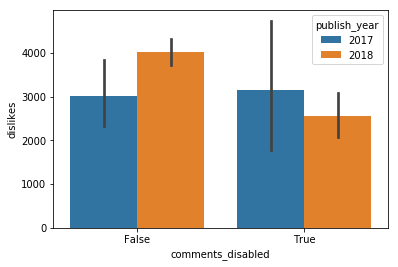

In [140]:
sns.barplot(x="comments_disabled",y="dislikes",data=US_video,hue="publish_year")



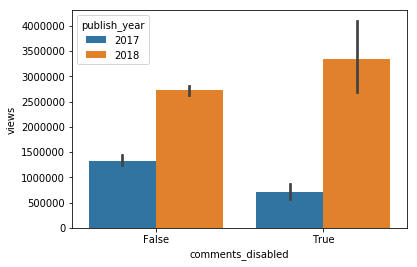

In [141]:
sns.barplot(x="comments_disabled",y="views",data=US_video,hue="publish_year")




In [142]:
US_video.groupby("comments_disabled")["views","likes","dislikes"].mean()

,views,likes,dislikes
comments_disabled,,,
False,2.375077e+06,75638.569044,3754.405022
True,2.558786e+06,21789.430177,2727.913323


False    40486
True       162
Name: ratings_disabled, dtype: int64


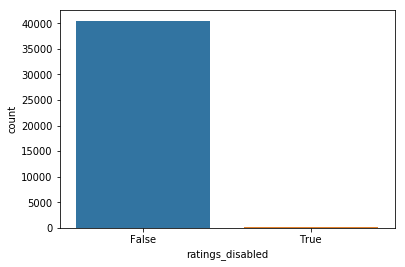

In [143]:
print(US_video["ratings_disabled"].value_counts())
sns.countplot(x="ratings_disabled",data=US_video)

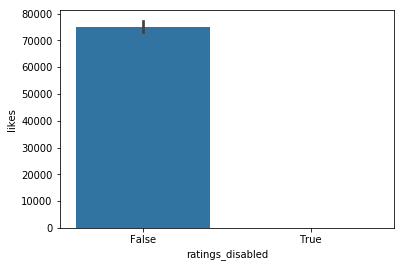

In [144]:
sns.barplot(x="ratings_disabled",y="likes",data=US_video)

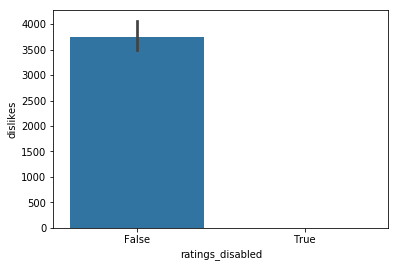

In [145]:
sns.barplot(x="ratings_disabled",y="dislikes",data=US_video)

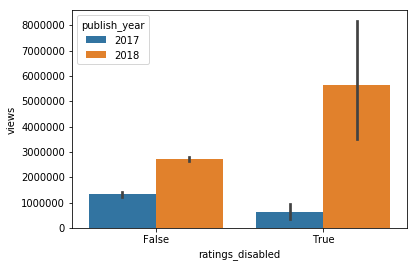

In [146]:
sns.barplot(x="ratings_disabled",y="views",data=US_video,hue="publish_year")

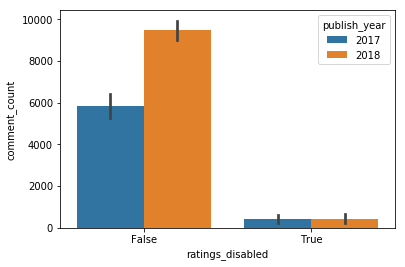

In [147]:
sns.barplot(x="ratings_disabled",y="comment_count",data=US_video,hue="publish_year")


In [148]:
US_video.groupby("ratings_disabled")["views","likes","dislikes","comment_count"].mean()

,views,likes,dislikes,comment_count
ratings_disabled,,,,
False,2.370197e+06,75112.59549,3753.632144,8541.09050
True,4.301190e+06,0.00000,0.000000,429.91358


False    40625
True        23
Name: video_error_or_removed, dtype: int64


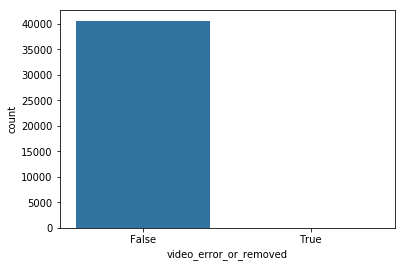

In [149]:
sns.countplot(x="video_error_or_removed",data=US_video)
print(US_video["video_error_or_removed"].value_counts())

,views,likes,dislikes,comment_count
video_error_or_removed,,,,
False,2.378301e+06,74827.983286,3739.972209,8512.128788
True,1.657090e+06,48770.434783,1442.608696,2565.391304


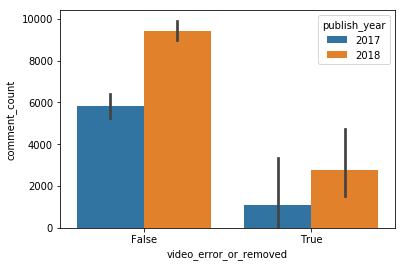

In [150]:

sns.barplot(x="video_error_or_removed",y="comment_count",data=US_video,hue="publish_year")
US_video.groupby("video_error_or_removed")["views","likes","dislikes","comment_count"].mean()

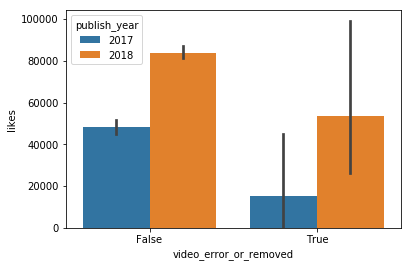

In [151]:
sns.barplot(x="video_error_or_removed",y="likes",data=US_video,hue="publish_year")

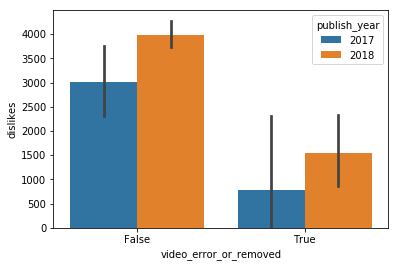

In [152]:
sns.barplot(x="video_error_or_removed",y="dislikes",data=US_video,hue="publish_year")

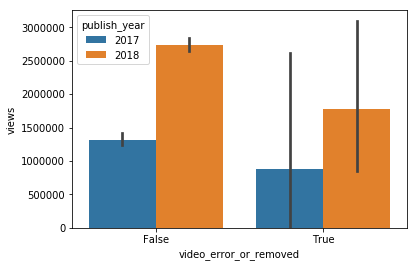

In [153]:
sns.barplot(x="video_error_or_removed",y="views",data=US_video,hue="publish_year")

In [154]:
print(US_video["tags"].value_counts())

[none]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     1485
ABC|"americanidol"|"idol"|"american idol"|"ryan"|"seacrest"|"ryan seacrest"|"katy"|"perry"|"katy perry"|"luke"|"bryan"|"luke bryan"|"lionel"|"richie"|"lionel richie"|"season 16"|"american idol XVI"|"television"|"ad"|"spring"|"2018"|"music"|"reality"|"competition"|"song"|"sing"|"audition"|"auditions"|"performance"|"live"|"fox"|"AI"|"hollywood"|"contestant"|"official"|"american"|"official american idol"|"hollywood week"|"hometown audition"               

In [155]:
print(US_video["description"].value_counts())

► Listen LIVE: http://power1051fm.com/\n► Facebook: https://www.facebook.com/Power1051NY/\n► Twitter: https://twitter.com/power1051/\n► Instagram: https://www.instagram.com/power1051/                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [156]:
US_video.drop(["tags","description","title","channel_title","publish_time","video_id","thumbnail_link","trending_date"],axis=1,inplace=True)

In [164]:
data1=US_video.copy(deep=True)

In [165]:
data1["comments_disabled"]=(data1["comments_disabled"]=="True").astype(int)

In [166]:
data1["ratings_disabled"]=(data1["ratings_disabled"]=="True").astype(int)

In [167]:
data1["video_error_or_removed"]=(data1["video_error_or_removed"]=="True").astype(int)

In [168]:
data1["likes"]=np.log(data1["likes"])

In [169]:
data1["dislikes"]=np.log(data1["dislikes"])

In [170]:
data1["views"]=np.log(data1["views"])

In [171]:
data1["comment_count"]=np.log(data1["comment_count"])

In [172]:
data1["views"]=data1["views"].replace([np.inf,-np.inf],np.nan)

In [173]:
data1["dislikes"]=data1["dislikes"].replace([np.inf,-np.inf],np.nan)

In [174]:
data1["likes"]=data1["likes"].replace([np.inf,-np.inf],np.nan)
data1["comment_count"]=data1["comment_count"].replace([np.inf,-np.inf],np.nan)
data1.isnull().sum()
data1.dropna(axis=0,how='any',inplace=True)

In [175]:
data1=pd.get_dummies(data1,drop_first=True)
x=data1.drop("likes",axis=1,inplace=False)
x=x.values
y=data1["likes"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


lgr=LinearRegression(fit_intercept=True)
fit_model=lgr.fit(x_train,y_train)
prediction=lgr.predict(x_test)

print(fit_model.score(x_test,y_test))
print(r2_score(y_test,prediction))

0.9071937297912789
0.9071937297912789


0.0038550257564653675


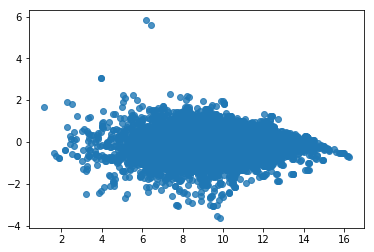

In [176]:
residual=y_test-prediction
print(residual.mean())
sns.regplot(prediction,residual,fit_reg=False)

In [177]:
base_pred=np.repeat(np.mean(y_test),len(y_test))
base_rms=np.sqrt(mean_squared_error(y_test,base_pred))
rms=np.sqrt(mean_squared_error(y_test,prediction))
print(base_rms)
print(rms)

1.928061562596312
0.5873670180748883


In [178]:
x1=data1.drop("likes",axis=1,inplace=False)
x1=sm.add_constant(x1)
y1=data1["likes"]

model=sm.OLS(y,x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          4.726e+05
Date:                Wed, 08 Apr 2020   Prob (F-statistic):                        0.00
Time:                        19:51:22   Log-Likelihood:                         -35165.
No. Observations:               39781   AIC:                                  7.038e+04
Df Residuals:                   39757   BIC:                                  7.058e+04
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
